In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_digits
df = load_digits()

In [96]:
numbers = df['data']

In [8]:
target = df['target']

In [91]:
numbers

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

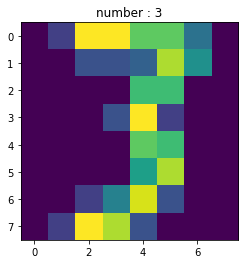

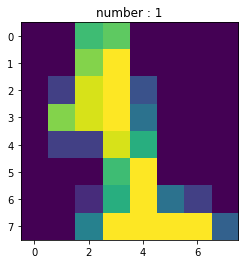

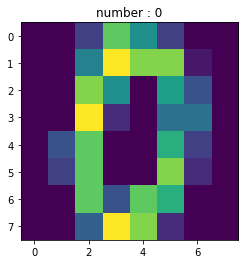

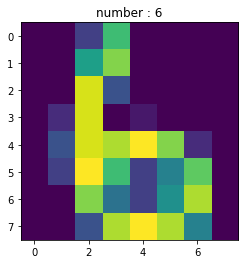

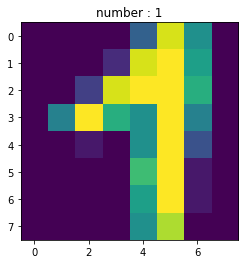

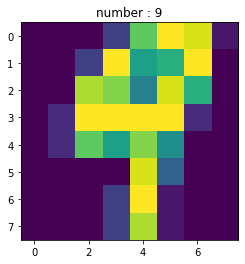

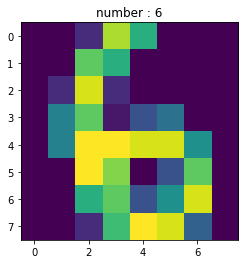

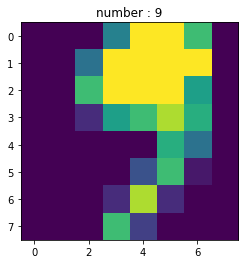

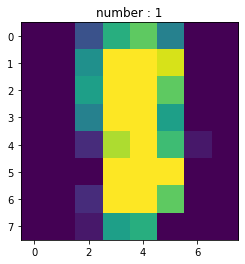

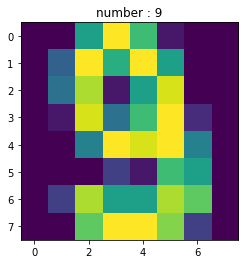

In [47]:
for i in np.random.choice(1797, 10):
    plt.imshow(df['images'][i])
    plt.title("number : {}".format(df['target'][i]))
    plt.show()

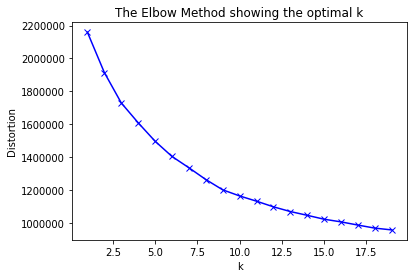

In [63]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(pd.DataFrame(numbers))
    kmeanModel.fit(pd.DataFrame(numbers))
    #distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

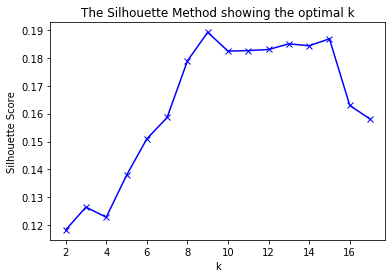

In [68]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 17

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(pd.DataFrame(numbers))
  labels = kmeans.labels_
  sil.append(silhouette_score(pd.DataFrame(numbers), labels, metric = 'euclidean'))

plt.plot(range(2,18), sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

In [117]:
kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(numbers)

KMeans(n_clusters=10, random_state=42)

In [124]:
from sklearn.metrics import accuracy_score

accuracy_score(target,kmeans.predict(numbers))

0.10573177518085698

In [144]:
new = pd.concat([pd.DataFrame(kmeans.predict(pd.DataFrame(numbers))),pd.DataFrame(df['target'])],axis = 1)
new.columns = ['pred', 'act']
new['diff'] = new['pred'] - new['act']

fig, ax = plt.subplots(figsize = (20,6))
sns.lineplot(y = 'pred', x = new.reset_index()['index'], data = new)
sns.lineplot(y = 'act', x = new.reset_index()['index'], data = new)
plt.xlim([0,200])

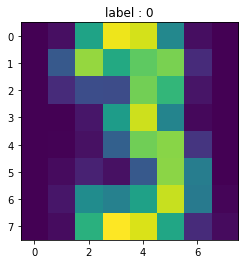

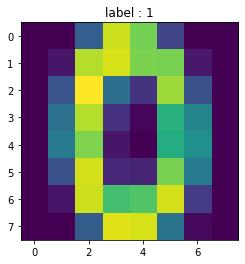

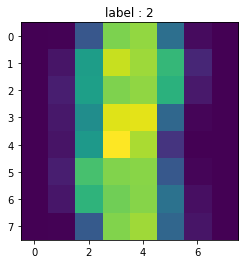

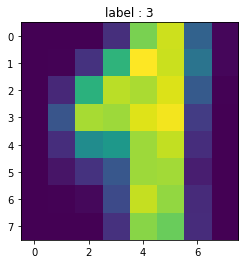

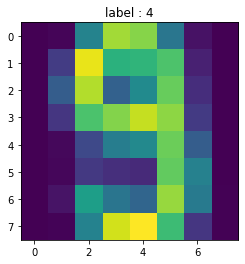

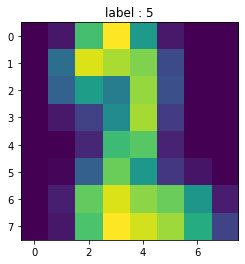

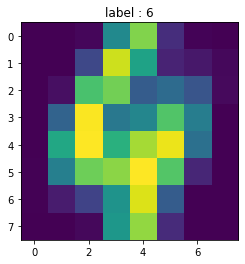

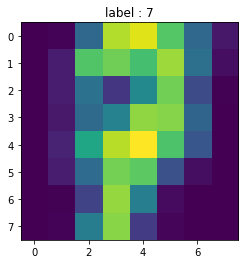

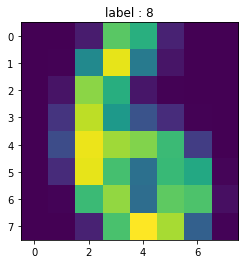

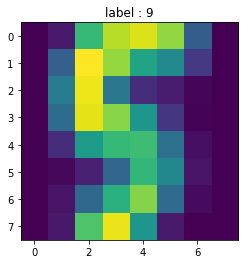

In [143]:
for i in range(10):
    plt.imshow(kmeans.cluster_centers_[i].reshape(8,8))
    plt.title("label : {}".format(i))
    plt.show()

npp = np.array([kmeans.cluster_centers_[1]])
for i in [3,5,0,6,9,8,7,2,4]:
    npp = np.append(npp, np.array([kmeans.cluster_centers_[i]]), axis=0)

In [213]:
dic = {1:0,3:1,5:2,0:3,6:4,9:5,8:6,7:7,2:8,4:9}
np1 = np.empty(0)
for i in kmeans.predict(numbers):
    np1 = np.append(np1, dic[i])

In [214]:
accuracy_score(target,np1)

0.7924318308291597

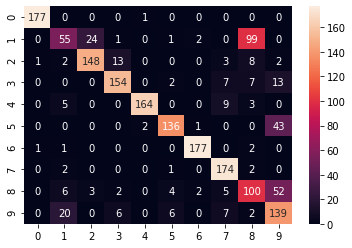

In [215]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, np1)
sns.heatmap(cm, annot=True, fmt="d")